### Lab Assignment 10: Logistic Regression for Fraud Detection

##### Aim: To implement Logistic Regression for binary classification using the Credit Card Fraud dataset, focusing on classification metrics, model evaluation, and threshold optimization.

### Task 1: Load and Explore the Dataset

#### 1. Load the Credit Card Fraud dataset using pandas.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### 2. Display dataset characteristics:

##### − Number of records and features

In [3]:
df.shape

(284807, 31)

In [4]:
num_records , num_features = df.shape
print(f"Number of Records: {num_records}")
print(f"Number of Features: {num_features}")

Number of Records: 284807
Number of Features: 31


##### − Number of fraudulent vs. non-fraudulent transactions (check for imbalance)

In [5]:
fraud_counts = df['Class'].value_counts()
fraud_counts

Class
0    284315
1       492
Name: count, dtype: int64

##### − Summary statistics

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### 3. Visualize the distribution of fraudulent vs. non-fraudulent transactions.

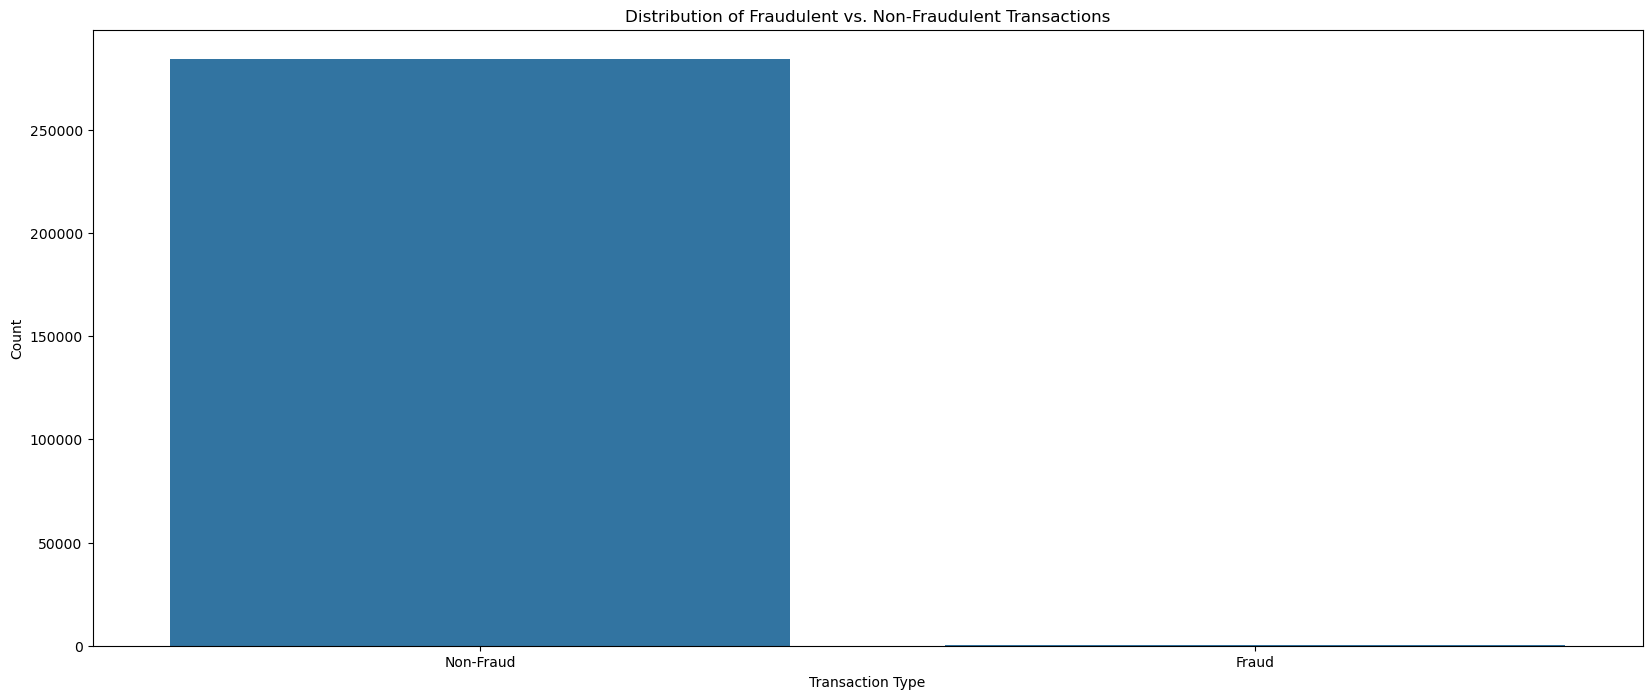

In [7]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['Class'])
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Distribution of Fraudulent vs. Non-Fraudulent Transactions")
plt.show()

### Task 2: Data Preprocessing

#### 1. Handle missing values if any exist.

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### 2. Normalize numerical features for better model performance.

In [9]:
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['Class'])
y = df['Class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### 3. Handle class imbalance using:

In [10]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


##### − Oversampling (SMOTE)

In [11]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

##### − Undersampling

In [12]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(random_state=42)
X_under,y_under = undersample.fit_resample(X,y)

#### 4. Split the dataset into training (80%) and testing (20%) sets.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

### Task 3: Train a Logistic Regression Model

#### 1. Implement Logistic Regression using Scikit-learn.

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', random_state=42)

#### 2. Train the model on the training dataset.

In [15]:
lr.fit(X_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

#### 3. Analyze the model’s coefficients to understand feature importance.

In [16]:
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': np.abs(lr.coef_[0])})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
feature_importance.head(10)

,Feature,Coefficient
14,V14,0.560496
3,V3,0.435161
4,V4,0.379449
12,V12,0.296215
10,V10,0.258227
11,V11,0.164340
17,V17,0.153495
9,V9,0.142964
16,V16,0.129540
6,V6,0.120400


### Task 4: Model Evaluation and Threshold Optimization

#### 1. Evaluate model performance using:

In [17]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report,confusion_matrix

y_pred = lr.predict(X_test)

##### − Accuracy

In [18]:
acc = accuracy_score(y_pred,y_test)
print(f"Accuracy Score: {acc:.3f}")

Accuracy Score: 0.965


##### − Precision, Recall, and F1-score

In [19]:
pre = precision_score(y_pred,y_test)
print(f"Presicion Score: {pre:.3f}")

Presicion Score: 0.946


In [20]:
recall = recall_score(y_pred,y_test)
print(f"Recall Score: {recall:.3f}")

Recall Score: 0.984


In [21]:
f1 = f1_score(y_pred,y_test)
print(f"f1 Score: {f1:.3f}")

f1 Score: 0.965


In [22]:
cr = classification_report(y_pred,y_test)
print("Classification Report:\n",cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97     59029
           1       0.95      0.98      0.96     54697

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



##### − Confusion Matrix

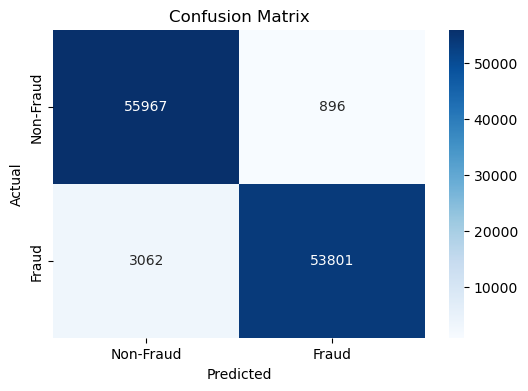

In [23]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

##### − ROC Curve and AUC Score

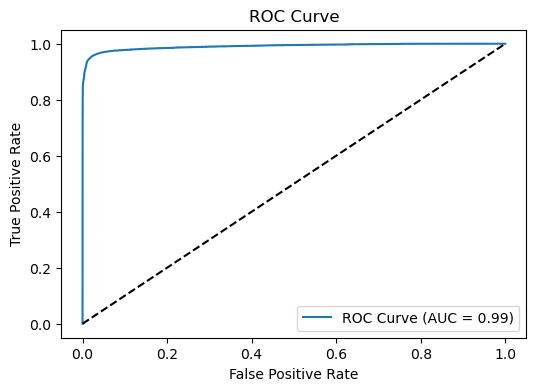

In [24]:
from sklearn.metrics import roc_curve,auc

y_prob = lr.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#### 2. Experiment with different decision thresholds to optimize fraud detection.

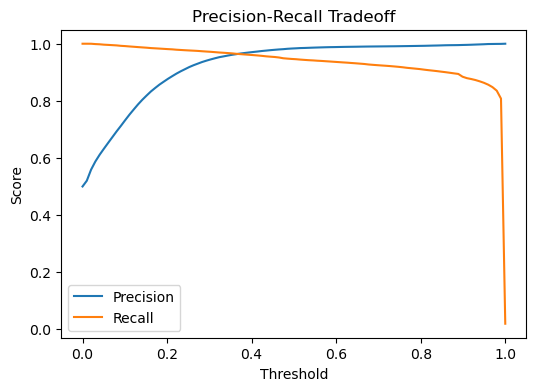

In [25]:
thresholds = np.linspace(0, 1, 100)
precisions, recalls = [], []

for t in thresholds:
    y_pred_thresh = (y_prob >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred_thresh))
    recalls.append(recall_score(y_test, y_pred_thresh))
    
plt.figure(figsize=(6,4))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Tradeoff")
plt.legend()
plt.show()


#### 3. Compare performance before and after handling class imbalance.

In [26]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
log_reg_orig = LogisticRegression(solver='liblinear', random_state=42)
log_reg_orig.fit(X_train_orig, y_train_orig)
y_pred_orig = log_reg_orig.predict(X_test_orig)

In [27]:
accuracy_orig = accuracy_score(y_test_orig, y_pred_orig)
precision_orig = precision_score(y_test_orig, y_pred_orig)
recall_orig = recall_score(y_test_orig, y_pred_orig)
f1_orig = f1_score(y_test_orig, y_pred_orig)

In [28]:
performance_comparison = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score"],
    "Original Data": [round(accuracy_orig, 2), round(precision_orig, 2), round(recall_orig, 2), round(f1_orig, 2)],
    "SMOTE Data": [round(acc, 2), round(pre, 2), round(recall, 2), round(f1, 2)]
}

df_performance = pd.DataFrame(performance_comparison)
print("Comparing Performance before and after handling class imbalance:")
print(df_performance)

Comparing Performance before and after handling class imbalance:
      Metric  Original Data  SMOTE Data
0   Accuracy           1.00        0.97
1  Precision           0.73        0.95
2     Recall           0.67        0.98
3   F1-score           0.70        0.96
